# **Import Data**

In [341]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import numpy as np

def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(Path("datasets"))
  return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [342]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [343]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


On remarque que total_bedrooms a 20 433 valeurs non null alors qu'il y a 20 640 lignes, il y a donc 207 valeurs nulles à supprimer.

# **Data observation**

In [344]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [345]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000




*   On remarque que les "median_income" sont réduits : 1 = 10 000 $
*   Les house_value sont eux en valeurs réelles




array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

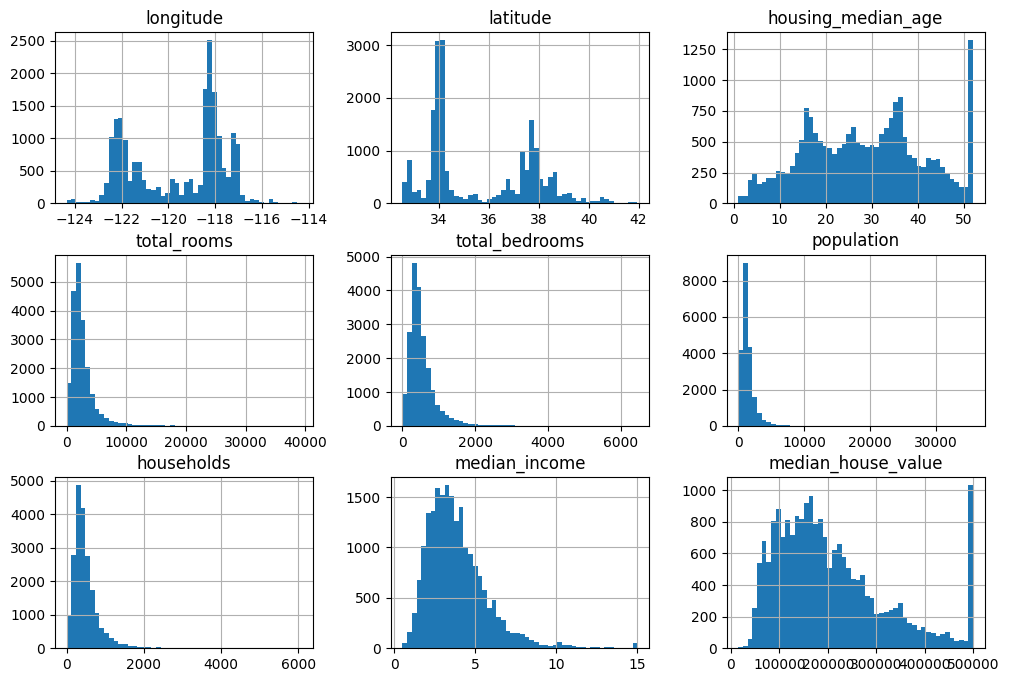

In [346]:
housing.hist(bins=50, figsize=(12,8))

# **Split Train - Test**

In [347]:
def shuffle_and_split_data(data, test_ratio):
  shuffled_indices = np.random.permutation((len(data)))
  test_set_size = int(len(data)*test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

#pour les series temporelles on ne peut pas mélanger les lignes doncs :

def split_data(data,test_ratio):
  test_set_size = int(len(data)*test_ratio)
  test_indices = data[:test_set_size]
  train_indices = data[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [348]:
train_set, test_set = shuffle_and_split_data(housing,0.2)
print(f"ratio_test = {len(test_set)/len(housing)}")

ratio_test = 0.2




*   Cette méthode présente un probleme, après plusieur mélange le modele aura vu l'entiereté des données et donc la partie test ne sera plus révélatrice.
*   On veut que le modele ne puisse jamais avoir vu l'ensemble des données meme après plusieurs run du code donc on va fixer les id qu'il n'a pas le droit de prendre dans la table train.



In [349]:
from zlib import crc32

def is_id_in_test_set(id, test_ratio):
  return crc32(np.int64(id)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set= ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]


#on crée l'id (on prend le numéro de ligne)
housing_with_id = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2,"index")

test_set.head(10)

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
5,5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
16,16,-122.27,37.85,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,NEAR BAY
23,23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY
25,25,-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY
30,30,-122.28,37.84,49.0,1916.0,447.0,863.0,378.0,1.9274,122300.0,NEAR BAY
35,35,-122.27,37.83,49.0,1215.0,282.0,570.0,264.0,1.4861,97200.0,NEAR BAY
36,36,-122.27,37.83,48.0,1798.0,432.0,987.0,374.0,1.0972,104500.0,NEAR BAY
42,42,-122.26,37.84,49.0,713.0,202.0,462.0,189.0,1.0250,118800.0,NEAR BAY


On peut aussi avec sklearn utiliser train_test_spit(housing,test_size=0.2, randam_state=42)

La méthode shuffle qui consiste à mélanger les données pour en choisir ceux qui feront la table test et la table train est efficace lorsque notre table de données est assez grande sinon, cette méthode risque d'introduire un biais.

Pour éviter cela nous allons divisé nos données en catégories, selon les revenues moyesn ici (nous aurions pu catégoriser selon une autre variable de la même façon).

Enfin nous pourrons alors savoir la proportions de chaque catégories dans notre table et faire en sorte de choisir nos données test et train de sorte à respecter ces proportions

In [350]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3.0,4.5,6.,np.inf],
                               labels=[1,2,3,4,5])

<Axes: xlabel='income_cat'>

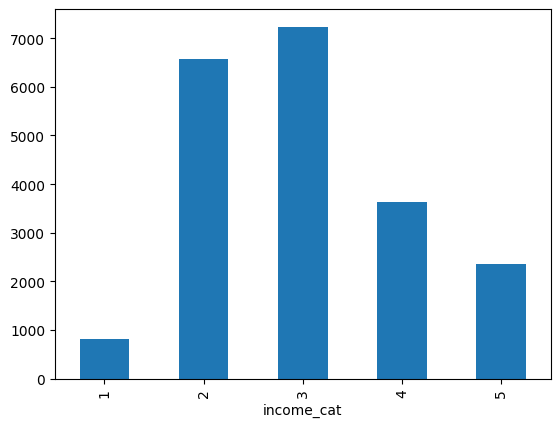

In [351]:
housing["income_cat"].value_counts().sort_index().plot.bar()

Maintenant, à partir de nos catégorie et des proportions de chaque catégories, nous allons pouvoir créer nos tables train et test

In [352]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

"""version explicit :
splitter = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state = 42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append([strat_train_set_n,strat_test_set_n])

strat_train_set , strat_test_set = strat_splits[0]
"""

strat_train_set , strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing["income_cat"], random_state=42)


Vérifions les proportions de chaque catégorie income_cat et comparons les pour la table test et la table global

In [353]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [354]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

# **data visualisation and studies of correlations between variables**

Habitations

<Axes: xlabel='longitude', ylabel='latitude'>

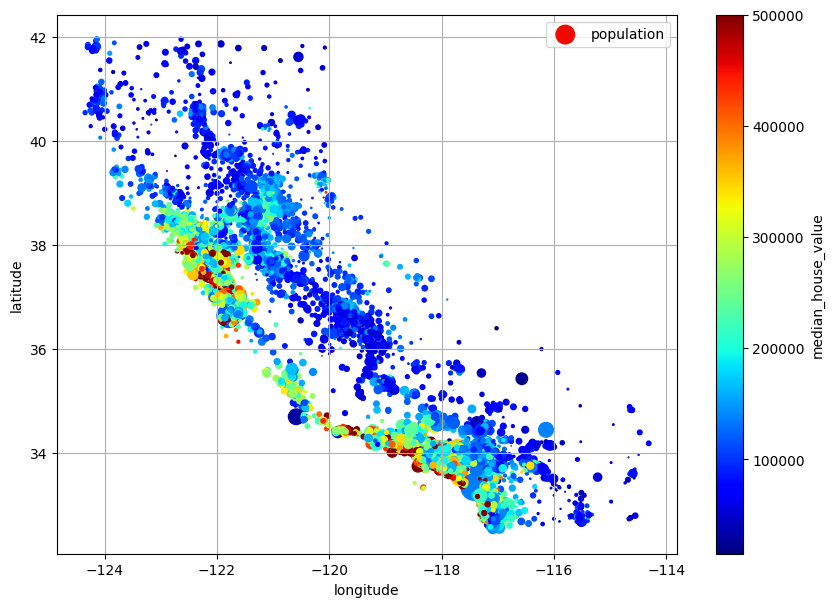

In [355]:
housing.plot(kind="scatter",x="longitude",y="latitude", grid=True,
             s=housing["population"]/100, label="population",
             c= "median_house_value", cmap="jet", colorbar=True,
             legend= True, sharex= False, figsize =(10,7))

On va tracer la matrice de correlation :

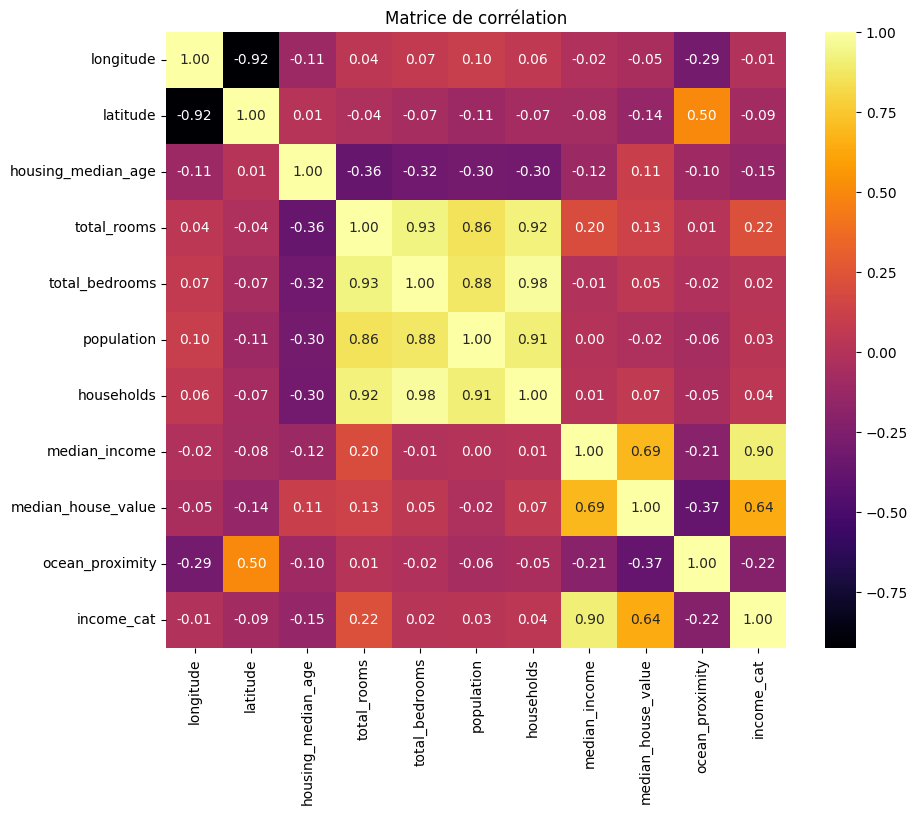

In [356]:
import seaborn as sns
import matplotlib.pyplot as plt

mapping = {'<1H OCEAN': 1, 'ISLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4, "INLAND":5}
houssing_corr = housing
houssing_corr['ocean_proximity'] = houssing_corr['ocean_proximity'].replace(mapping)
corr_matrix = houssing_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='inferno', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()


Vérifions cela par les graphes :

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

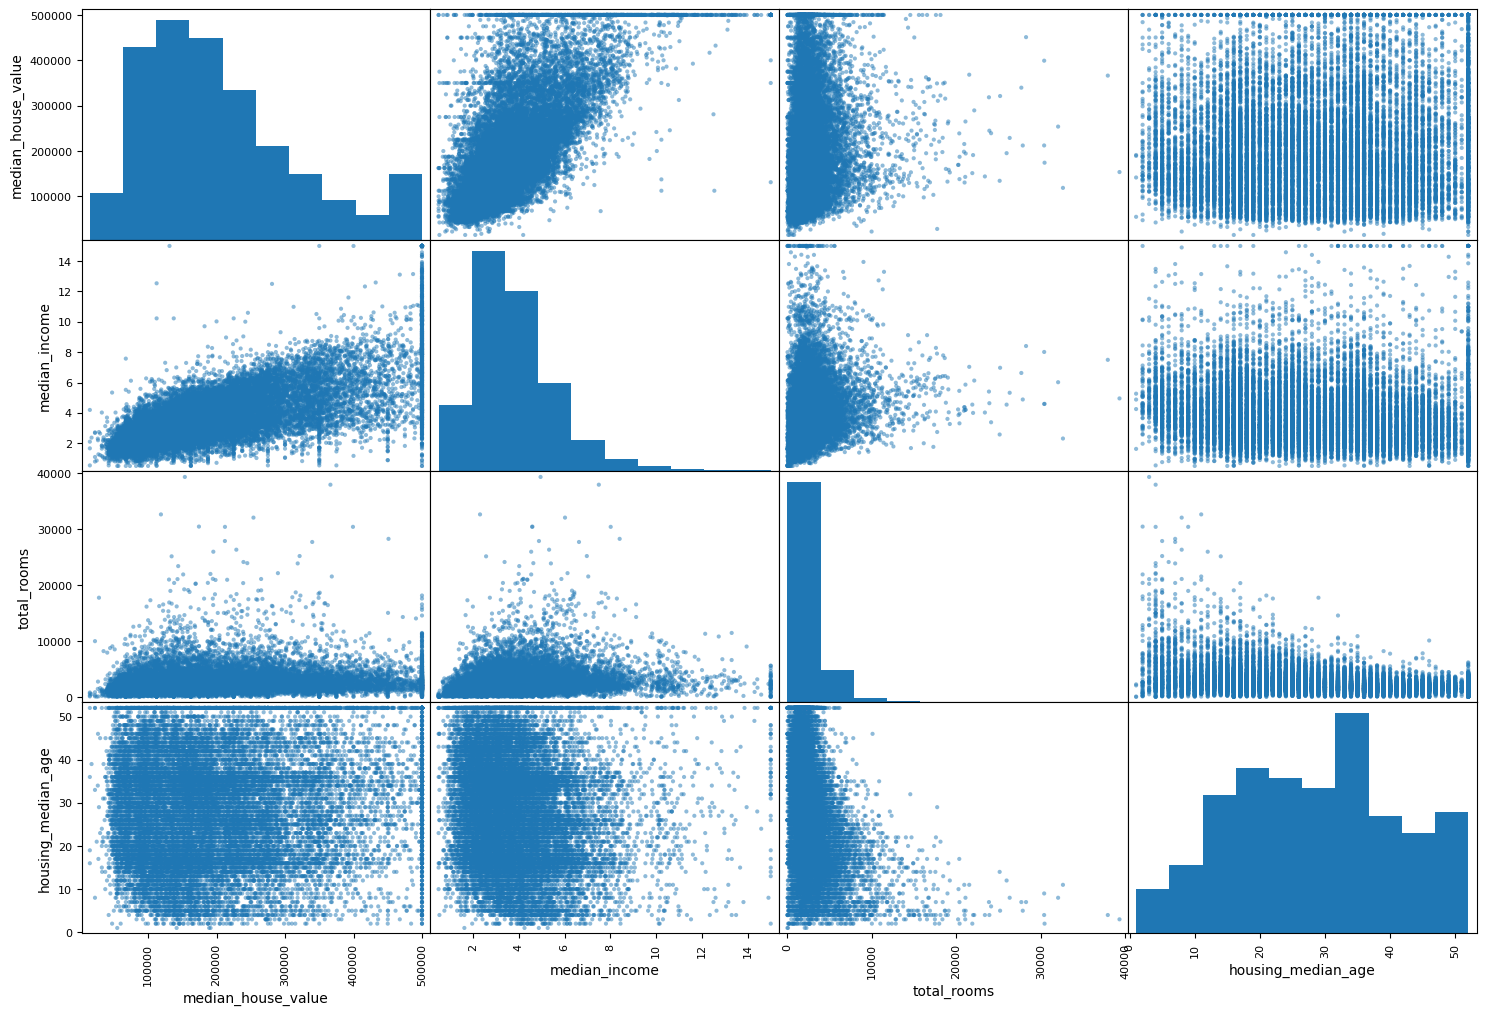

In [357]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income","total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(18,12))

On regardant la ligne "median_house_value" on remarque que la variable la plus corrélée avec est la variable "median_income"

<Axes: xlabel='median_income', ylabel='median_house_value'>

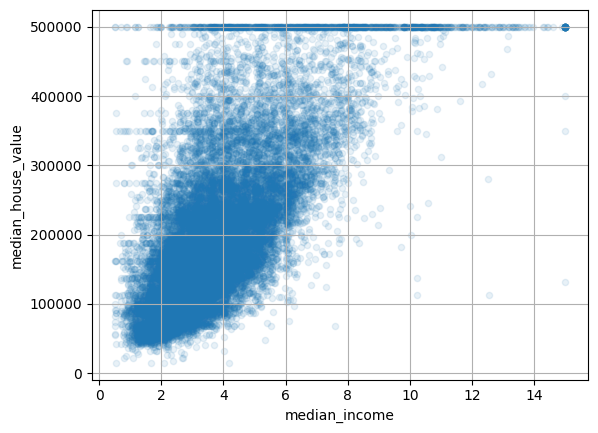

In [358]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)

# **Choix des variables à utiliser pour le modele :**

Observons les coefficients de corrélations

In [359]:
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
ocean_proximity      -0.370865
Name: median_house_value, dtype: float64

Nous allons essayer de créer des variables qui aurait un coefficient de correlations plus important :

*   rooms_per_house
*   bedrooms_ratio
*   people_per_house



In [360]:
houssing_corr["rooms_per_house"] = houssing_corr["total_rooms"] /  houssing_corr["households"]
houssing_corr["bedrooms_ratio"] = houssing_corr["total_bedrooms"] /  houssing_corr["total_rooms"]
houssing_corr["people_per_house"] = houssing_corr["population"] /  houssing_corr["households"]

In [361]:
corr_matrix = houssing_corr.corr()
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
ocean_proximity      -0.370865
Name: median_house_value, dtype: float64

On remarque que bedrooms_ratio est bien corrélée avec median_house_value comparé aux autres varaibles.
Plus le ratio est faible plus le prix de la maison est élevée

# **Data preparation and cleaning for training**

# Gestion des données qualitatives

On enlève la varaible cible des données pour l'entrainement

In [362]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

On doit maintenant géré les données manquante de la colonne total_bedrooms (207 valeurs manquantes), on va remplir les case vide par la moyenne de la colonnes

In [363]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "most_frequent") #cela signifie que les case vide seront remplacer par la valeur la plus fréquente dans la colonne
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='most_frequent')

In [364]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [365]:
X=imputer.transform(housing_num)

On transforme maintenant notre table housing pour y inclure les valeurs décidé à la place des données manquantes

In [366]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

In [367]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


Nous allons tranformer ces données pour en faire des donénes numérique (on va encoder chaque valeur par un nombre

In [368]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

On peut ensuite savoir à quelle categorie correspond chaque valeur :

In [369]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Cette méthode présente une limite qui est que les lignes contenant des valeurs proches seront considéré comme semblable même si elle représente deux categorie eloignée.

Pour y pallier on créer une nouvelle variable binaire contenant 0 si  la catégorie est "<1H OCEAN" et 0 sinon de même on crée une variable binaire pour la catégorie "INLAND"

In [370]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [371]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

On la stock sous forme de tableau Numpy

In [372]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [373]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [374]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [375]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

# **calibration**

# Transformateur sklearn

Le modèle peut être moins efficaces lorsque les écarts entre les valeurs d'entrées d'une meme variables sont trop grandes -> on recalibre pour avoir uniquement de valeurs entre 0 et 1 par exemple (valeur - min)/(max - min)

In [376]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

Gestion et transformation des variables multimodales : housing_median_age

on utilise la transformation par la fonction radiale : exp(-gamma(x-35)^2)

In [377]:
from sklearn.metrics.pairwise import rbf_kernel
age_simil_35 = rbf_kernel(housing[["housing_median_age"]],[[35]], gamma=0.1)

plus gamma est petit plus la queue de distribution de la variable sera petite

Lorsque la variable d'entrée a été transformer, le modèle prédira alors la nouvelle variable après transformation, il faudra alors prendre l'inverse de la transformation pour avoir la prédiction réelles (voir ci-dessous)

In [378]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
new_data = housing[["median_income"]].iloc[:5]

scaled_predictions = model.predict(new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

autre méthode

In [379]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer = StandardScaler())

model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(new_data)

predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

# Création d'un Transformateur personalisé

tranformation log

In [380]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[["population"]])

Exemple pour RBF

In [381]:
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma = 0.1))

age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

Nous allons maintenant voir comment créer simplement une class se comportant comme StandardScaler

In [382]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted

class StandardScalerClone(BaseEstimator, TransformerMixin):
  def __init__(self, with_mean=True):
    self.with_mean = with_mean

  def fit(self, X, y=None):
    X= check_array(X)
    self.mean_ = X.mean(axis=0)
    self.scale_ = X.std(axis=0)
    self.n_features_in_ = X.shape[2]
    return self

  def transform(self,X):
    check_is_fitted(self)
    X = check_array(X)
    assert self.n_features_in_ == X.shape[1]
    if self.with_mean:
      X = X - self.mean_
    return X / self.scale_

Exemple de Kmean

In [383]:
from sklearn.cluster import KMeans

class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters = 10, gamma = 1.0, random_state = None):
    self.n_clusters= n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight = None):
    self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
    self.kmeans_.fit(X,sample_weight= sample_weight)
    return self

  def transform(self,X):
    return rbf_kernel(X,self.kmeans_.cluster_centers_, gamma=self.gamma)

  def get_feature_names_out(self, names=None):
    return [f"Similarité du cluster {i}" for i in range(self.n_clusters)]


In [384]:
cluster_simil = ClusterSimilarity(n_clusters = 10, gamma=1.0, random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight= housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [385]:
similarities[:3].round(2)

array([[0.  , 0.14, 0.  , 0.  , 0.  , 0.08, 0.  , 0.99, 0.  , 0.6 ],
       [0.63, 0.  , 0.99, 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.  ],
       [0.  , 0.29, 0.  , 0.  , 0.01, 0.44, 0.  , 0.7 , 0.  , 0.3 ]])

<Axes: xlabel='longitude', ylabel='latitude'>

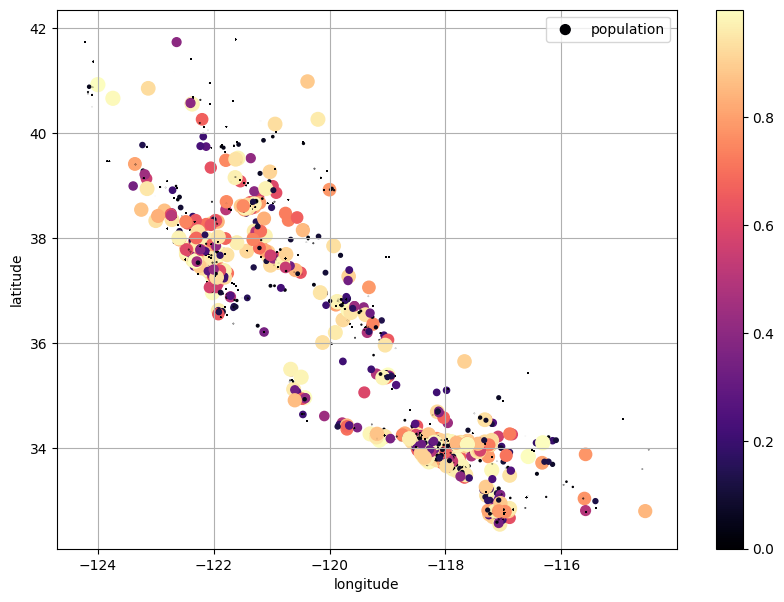

In [386]:
similarities_3 = similarities[:300]

housing[:3000].plot(kind="scatter",x="longitude",y="latitude", grid=True,
             s=similarities_3*100, c= similarities_3, label="population",
             cmap="magma", colorbar=True,
             legend= True, sharex= False, figsize =(10,7))



# **Pipeline de transformation**

Les piplines permettent de recensé dans l'ordre chaque transformation à opérer sur les donénes pour les rendre utilisable pour le modele

In [387]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                             StandardScaler())

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms","total_bedrooms",
                 "population", "households", "median_income"]

cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])


autre methode :

In [388]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = ColumnTransformer([
    ("num", num_pipeline, make_column_selector(dtype_include= np.number)),
    ("cat", cat_pipeline, make_column_selector(dtype_include= object))
])

In [389]:
housing_prepared = preprocessing.fit_transform(housing)

In [390]:

def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
  return ["ratio"]

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy = "median"),
      FunctionTransformer(column_ratio, feature_names_out=ratio_name),
      StandardScaler()
  )

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.,random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())


preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house",ratio_pipeline(), ["total_rooms","households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms","population", "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("income_cat", cat_pipeline, make_column_selector(dtype_include=object))
    ],
    remainder = default_num_pipeline)


In [391]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(16512, 25)

In [392]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Similarité du cluster 0',
       'geo__Similarité du cluster 1', 'geo__Similarité du cluster 2',
       'geo__Similarité du cluster 3', 'geo__Similarité du cluster 4',
       'geo__Similarité du cluster 5', 'geo__Similarité du cluster 6',
       'geo__Similarité du cluster 7', 'geo__Similarité du cluster 8',
       'geo__Similarité du cluster 9',
       'income_cat__ocean_proximity_<1H OCEAN',
       'income_cat__ocean_proximity_INLAND',
       'income_cat__ocean_proximity_ISLAND',
       'income_cat__ocean_proximity_NEAR BAY',
       'income_cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age', 'remainder__income_cat'],
      dtype=object)

# **Model selection and training**

**model regression linéaire**

In [393]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ce...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('income_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ce68f148d60>)])),
                ('linearregression', LinearRegression())])

In [394]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)

array([248000., 394100., 120700.,  90800., 330400.])

In [395]:
housing_labels.iloc[:5].values.round(-2)

array([458300., 483800., 101700.,  96100., 361800.])

On observe alors que notre model prédit des valeurs relativement proche exepté pour la premiere ou l'écart est de plus de 200 000

On verifie les indicateurs

In [396]:
from sklearn.metrics import mean_squared_error as rmse

lin_rmse = rmse(housing_labels, housing_predictions, squared= False)
lin_rmse

68047.65529482678

**model arbre de decision**

In [397]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing,
                         DecisionTreeRegressor(random_state = 42))
tree_reg.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7ce...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('income_cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ce68f148d60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [398]:
housing_predictions = tree_reg.predict(housing)
housing_predictions

array([458300., 483800., 101700., ..., 148800., 500001., 233300.])

In [399]:
tree_rmse = rmse(housing_labels, housing_predictions, squared = False)
tree_rmse

0.0

Nous obesrvons ici un cas d'overfiting (le modele est surajuster par rapport au données)

In [400]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                             scoring = "neg_root_mean_squared_error", cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [401]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66791.264537
std       1949.313791
min      64467.336441
25%      65232.401617
50%      65950.821214
75%      68417.300416
max      70051.355051
dtype: float64

le test avec sklearn nous permet donc de voir que le modèle d'arbre de décision est en réalité aussi peu précis que le modèle de régression linéaire

**Random forest**

In [402]:
from sklearn.ensemble import RandomForestRegressor as rf

forest_reg = make_pipeline(preprocessing,
                           rf(random_state = 42))
forest_rmse = -cross_val_score(forest_reg, housing, housing_labels,
                             scoring = "neg_root_mean_squared_error", cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [403]:
pd.Series(forest_rmse).describe()

count       10.000000
mean     47042.341721
std       1056.004286
min      45574.447034
25%      46507.787732
50%      46891.828872
75%      47346.956322
max      49424.336447
dtype: float64

Ce modèle semble alors être le mieux adapté nous choisissons donc le modèle **Random Forest**

# **Hyperparamètres**

Recherche d'hyperparamètres optimaux à l'aide de **GridSearchCV**

In [404]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", rf(random_state=42))
])

param_grid = [
    {'preprocessing__geo__n_clusters' : [5, 8, 10],
    'random_forest__max_features' : [4, 6, 8]},
    {'preprocessing__geo__n_clusters' : [10, 15],
     'random_forest__max_features' : [6, 8, 10]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5,
                           scoring = 'neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ce68f148d60>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [405]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

observons maintenant les scores d'évaluation du modèle une fois calibré

In [407]:
cv_res = pd.DataFrame(grid_search.cv_results_)

columns_to_invert = ['split0_test_score', 'split1_test_score', 'split2_test_score','split3_test_score','split4_test_score', 'mean_test_score']
cv_res[columns_to_invert] = cv_res[columns_to_invert].applymap(lambda x: -x if isinstance(x, (int, float)) else x)

cv_res.sort_values(by="mean_test_score", ascending= True, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,8.380257,0.570080,0.143847,0.017676,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",44543.888756,42834.684224,44514.617243,44441.927688,45048.303941,44276.684371,752.339920,1
13,9.885089,0.330560,0.138062,0.011564,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",44887.644865,43561.066732,44657.620504,45039.253826,44950.367724,44619.190730,543.930523,2
14,11.819002,0.267249,0.143552,0.015958,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",45395.602809,43974.273727,44760.828861,45507.402855,45336.217925,44994.865235,572.046698,3
7,7.812918,0.394671,0.153768,0.013107,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",45691.901843,44689.183389,45108.934380,45899.875762,45701.681152,45418.315306,450.421176,4
9,7.774567,0.423492,0.132773,0.002583,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",45691.901843,44689.183389,45108.934380,45899.875762,45701.681152,45418.315306,450.421176,4


**Recherche aléatoire d'hyperparamètres optimaux**

In [409]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters' : randint(low = 3, high = 50),
                 'random_forest__max_features' : randint(low= 2 , high = 20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions= param_distribs, n_iter = 10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42
)

rnd_search.fit(housing, housing_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce690733e20>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7ce690732f20>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [410]:
cv_res = pd.DataFrame(rnd_search.cv_results_)

columns_to_invert = ['split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score']
cv_res[columns_to_invert] = cv_res[columns_to_invert].applymap(lambda x: -x if isinstance(x, (int, float)) else x)

cv_res.sort_values(by="mean_test_score", ascending= True, inplace=True)

cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,10.547126,0.756630,0.246597,0.041255,45,9,"{'preprocessing__geo__n_clusters': 45, 'random...",42169.285127,42494.120294,43358.231648,42673.879023,501.752501,1
5,5.993178,0.372913,0.285196,0.048606,42,4,"{'preprocessing__geo__n_clusters': 42, 'random...",41939.078180,42739.203067,44010.014232,42896.098493,852.703998,2
8,8.458937,0.551252,0.224959,0.009862,32,7,"{'preprocessing__geo__n_clusters': 32, 'random...",42347.817777,43081.084052,44005.873555,43144.925128,678.402045,3
0,29.546523,5.004659,0.343407,0.007232,41,16,"{'preprocessing__geo__n_clusters': 41, 'random...",43236.143507,43660.508016,44267.737894,43721.463139,423.346501,4
2,8.922343,0.388998,0.217441,0.029279,23,8,"{'preprocessing__geo__n_clusters': 23, 'random...",43402.134204,43634.032876,44488.757475,43841.641518,467.271188,5


**On a ici de meilleur résultat donc on utilise Random Forest avec les hyperparaètres trouvé ici**

In [412]:
final_model =rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.05, 0.04, 0.05, 0.01, 0.01, 0.01, 0.01, 0.15, 0.03, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.01, 0.  , 0.01, 0.01, 0.01, 0.  , 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.  , 0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.06,
       0.  , 0.  , 0.  , 0.01, 0.13])

In [415]:
sorted(zip(feature_importances,
             final_model["preprocessing"].get_feature_names_out()),
      reverse=True)

[(0.15365254035279347, 'log__median_income'),
 (0.1262314446578157, 'remainder__income_cat'),
 (0.06225363455655132, 'income_cat__ocean_proximity_INLAND'),
 (0.051612484273610544, 'people_per_house__ratio'),
 (0.04931427487153142, 'bedrooms__ratio'),
 (0.0408096282881476, 'rooms_per_house__ratio'),
 (0.030714748001953073, 'geo__Similarité du cluster 0'),
 (0.02448402798091465, 'geo__Similarité du cluster 24'),
 (0.019924649860340052, 'geo__Similarité du cluster 43'),
 (0.0192890353113088, 'geo__Similarité du cluster 28'),
 (0.018930865283657804, 'geo__Similarité du cluster 34'),
 (0.014589499014575054, 'geo__Similarité du cluster 20'),
 (0.01410459325494003, 'geo__Similarité du cluster 27'),
 (0.013860673585194319, 'geo__Similarité du cluster 37'),
 (0.012963407439335585, 'geo__Similarité du cluster 31'),
 (0.012863131131503797, 'geo__Similarité du cluster 39'),
 (0.012684138729491095, 'remainder__housing_median_age'),
 (0.012201511063904713, 'geo__Similarité du cluster 3'),
 (0.012161

# **Model testing**

In [417]:
X_test = strat_test_set.drop("median_house_value",axis =1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)
final_rmse = rmse(y_test, final_predictions, squared=False)
final_rmse

42002.456469814824

intervalle de confiance à 95%

In [420]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))



array([39844.20607027, 44055.10119869])